# Imports

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Loading dataset

In [2]:
dataset = keras.datasets.fashion_mnist

**Treinando o modelo**

In [3]:
((X_train, y_train),(X_test, y_test)) = dataset.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

# Creating, compiling, training and image visualization

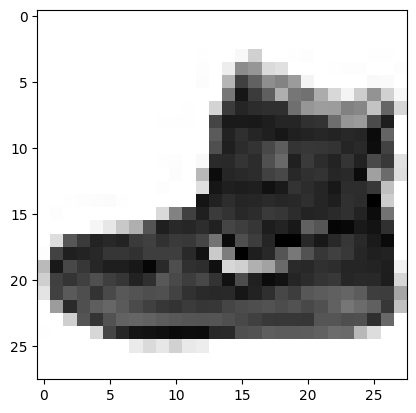

In [4]:
plt.imshow(X_train[0], cmap='Greys')

In [5]:
y_train.max()
y_train.min()
total_labels = 10

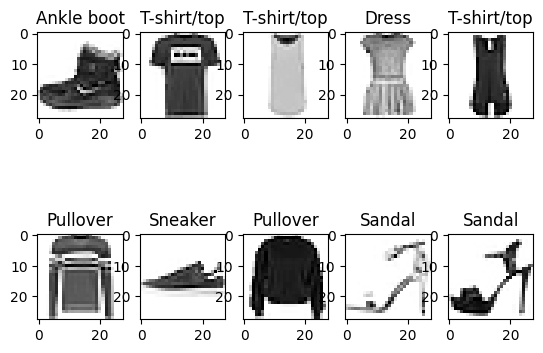

In [6]:
# By analyzing the fashion mnist documentation, it was possible to discover what each label means
""""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for image in range(total_labels):
    plt.subplot(2,5,image+1)
    plt.imshow(X_train[image], cmap='Greys')
    plt.title(label_names[y_train[image]])

The model is a sequence of input, processing, and output. Therefore, the ideal approach is to literally bring this logic into the code

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=l2(0.0005)), # Processing
    keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=l2(0.005)),
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=l2(0.01)), # Adding one more processing layer
    keras.layers.Dropout(0.2), # This line is to prevent overfitting
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output with 10 classes because we have 10 labels
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#Compiling the model before training it
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#Training the model using early stopping to improve accuracy in choosing epochs
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
history =  model.fit(X_train, y_train, epochs=42, validation_split=0.2, callbacks=[earlystop], batch_size=32)

Epoch 1/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6112 - loss: 7.4825 - val_accuracy: 0.7460 - val_loss: 2.3240
Epoch 2/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.7341 - loss: 2.1460 - val_accuracy: 0.8034 - val_loss: 1.4371
Epoch 3/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7910 - loss: 1.3346 - val_accuracy: 0.8257 - val_loss: 0.9478
Epoch 4/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8257 - loss: 0.8899 - val_accuracy: 0.8443 - val_loss: 0.6808
Epoch 5/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8408 - loss: 0.6746 - val_accuracy: 0.8522 - val_loss: 0.5631
Epoch 6/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8536 - loss: 0.5569 - val_accuracy: 0.8528 - val_loss: 0.5275
Epoch 7/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8558 - loss: 0.5057 - val_accuracy: 0.8653 - val_loss: 0.4628
Epoch 8/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8648 -

# saving and loading the model with 25 epochs

In [10]:
model.save('modelo.keras')
model_saved_25epochs = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

# Testing the model

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f} , \n Test loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.4834
Test accuracy: 0.858 , 
 Test loss: 0.490


## Ploting the graphs in epochs

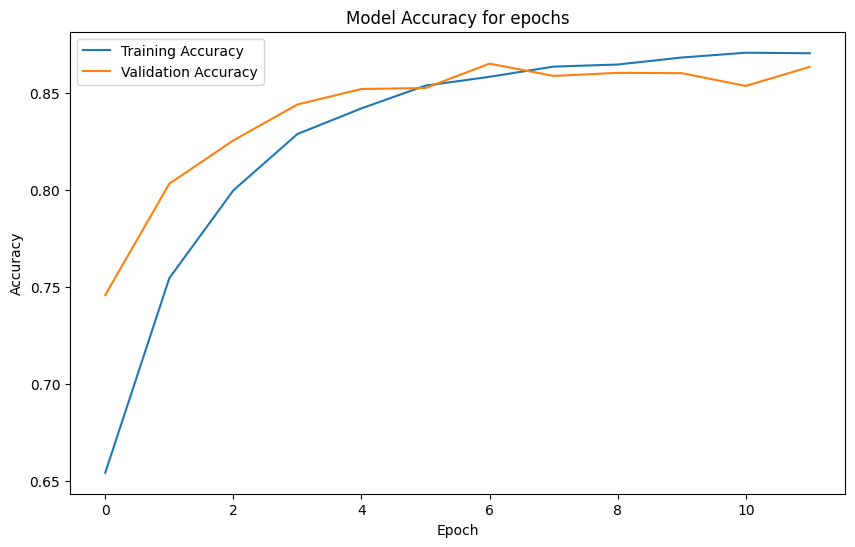

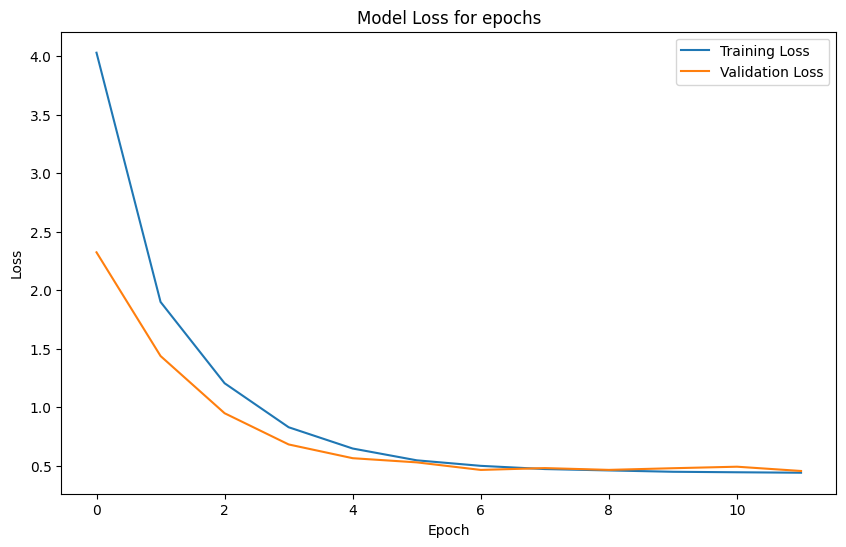

In [12]:
#Comparation training and validation accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Comparation training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Making predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


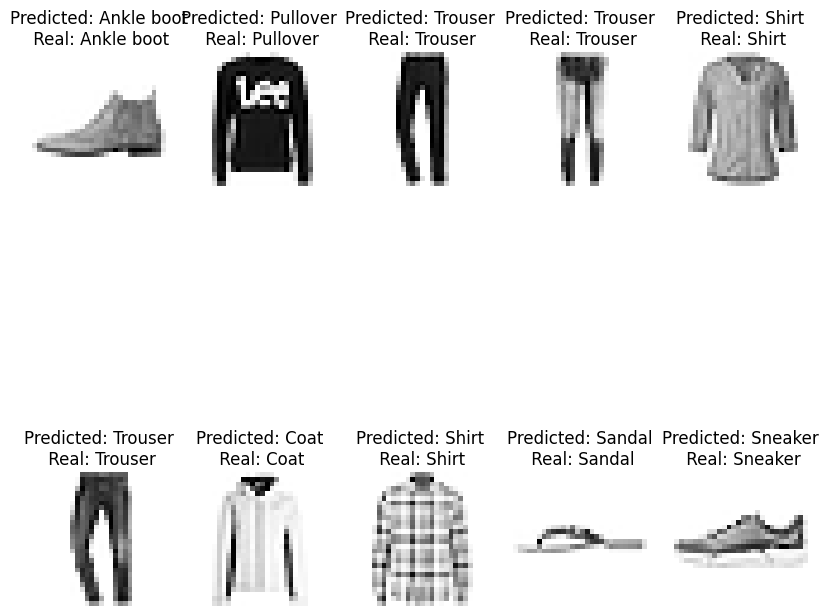

In [13]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#visualizing some predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title(f"Predicted: {label_names[predicted_classes[i]]}\n Real: {label_names[y_test[i]]}")
    plt.axis('off')
plt.show()

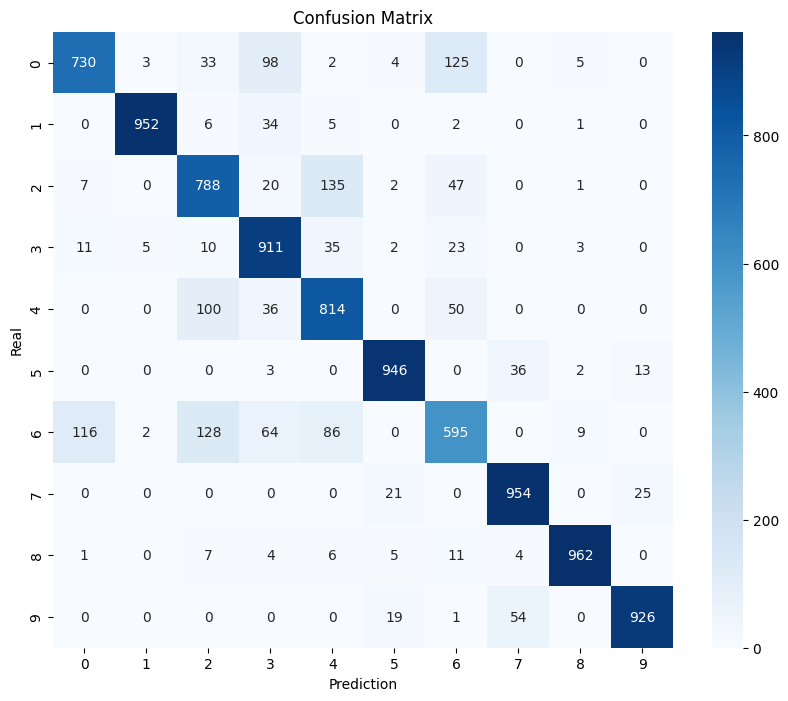

In [14]:
#Confusion matrix to visualize errors
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#Detailed classification report
print("Classification report")
print(classification_report(y_test, predicted_classes, target_names=label_names))

Classification report
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.73      0.78      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.74      0.79      0.76      1000
       Dress       0.78      0.91      0.84      1000
        Coat       0.75      0.81      0.78      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.70      0.59      0.64      1000
     Sneaker       0.91      0.95      0.93      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.93      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

